In [5]:
import pathlib
from matplotlib import pyplot as plt
from pvlib import soiling
import pvlib
import pandas as pd

# get full path to the data directory
DATA_DIR = pathlib.Path(pvlib.__file__).parent / 'data'
print(DATA_DIR)

# read rainfall, PM2.5, and PM10 data from file
imperial_county = pd.read_csv(DATA_DIR / 'soiling_hsu_example_inputs.csv',
                              index_col=0, parse_dates=True)
print(imperial_county)
rainfall = imperial_county['rain']
depo_veloc = {'2_5': 0.0009, '10': 0.004}  # default values from [1] (m/s)
rain_accum_period = pd.Timedelta('1h')     # default
cleaning_threshold = 0.5
tilt = 30
pm2_5 = imperial_county['PM2_5'].values
pm10 = imperial_county['PM10'].values
# run the hsu soiling model
soiling_ratio = soiling.hsu(rainfall, cleaning_threshold, tilt, pm2_5, pm10,
                            depo_veloc=depo_veloc,
                            rain_accum_period=rain_accum_period)

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/data
                     rain     PM2_5      PM10
TimeStamp                                    
2015-01-01 00:00:00     0  0.000387  0.000100
2015-01-01 01:00:00     0  0.000448  0.000049
2015-01-01 02:00:00     0  0.000077  0.000048
2015-01-01 03:00:00     0  0.000071  0.000032
2015-01-01 04:00:00     0  0.000087  0.000035
...                   ...       ...       ...
2015-12-31 19:00:00     0  0.000021  0.000041
2015-12-31 20:00:00     0  0.000021  0.000074
2015-12-31 21:00:00     0  0.000021  0.000041
2015-12-31 22:00:00     0  0.000021  0.000054
2015-12-31 23:00:00     0  0.000021  0.000043

[8760 rows x 3 columns]


/var/folders/v2/y6drgmqj4sn0q6c_zhksnv1c0000gn/T/ipykernel_21313/4009729498.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


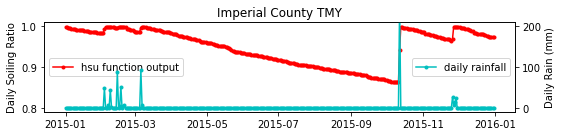

In [2]:
daily_soiling_ratio = soiling_ratio.resample('d').mean()
fig, ax1 = plt.subplots(figsize=(8, 2))
ax1.plot(daily_soiling_ratio.index, daily_soiling_ratio, marker='.',
         c='r', label='hsu function output')
ax1.set_ylabel('Daily Soiling Ratio')
ax1.set_ylim(0.79, 1.01)
ax1.set_title('Imperial County TMY')
ax1.legend(loc='center left')

daily_rain = rainfall.resample('d').sum()
ax2 = ax1.twinx()
ax2.plot(daily_rain.index, daily_rain, marker='.',
         c='c', label='daily rainfall')
ax2.set_ylabel('Daily Rain (mm)')
ax2.set_ylim(-10, 210)
ax2.legend(loc='center right')
fig.tight_layout()
fig.show()